 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [126]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [7]:
whl_data = Path("../Resources/whale_returns.csv")

In [8]:
whl = pd.read_csv(
    whl_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
whl = whl.sort_index()
whl.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [9]:
# Reading whale returns
whl = whl.sort_index()
whl.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [10]:
# Count nulls
whl.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [12]:
# Drop nulls
whl = whl.dropna().copy()
whl.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [15]:
# Reading algorithmic returns
algo_data = Path("../Resources/algo_returns.csv")
algo = pd.read_csv(
    algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
algo = algo.sort_index()
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [16]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [47]:
# Drop nulls
algo = algo.dropna().copy()
algo.isnull().sum()
algo.dtypes
algo.shape

(1235, 2)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [89]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = Path("../Resources/sp_tsx_history.csv")
sp = pd.read_csv(
    sp_tsx_history, index_col="Date", infer_datetime_format=True, parse_dates=True
)
sp = sp.sort_index()
sp.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [90]:
# Check Data Types
sp = sp.dropna().copy()
sp.shape
sp.dtypes

Close    object
dtype: object

In [91]:
# Fix Data Types
sp["Close"] = sp["Close"].str.replace("$", "")
sp["Close"] = sp["Close"].str.replace(",", "")
sp["Close"]

sp["Close"] = sp["Close"].astype("float")
sp

C:\Users\USER\AppData\Local\Temp\ipykernel_16224\78628161.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp["Close"] = sp["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [92]:
# Calculate Daily Returns
sp_returns = sp.pct_change()
sp_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [93]:
# Drop nulls
sp["Close"] = sp["Close"].dropna().copy()
sp

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [96]:
# Rename `Close` Column to be specific to this portfolio.
# set column names
#sp = sp.rename(columns={'Close':'SP Close'}, inplace=True)
sp.columns

# Set the new names for the columns
columns = ["SP Close"]

# Replace the current names of the columns with the new names
sp.columns = columns

# Display the DataFrame's head
sp.head()

,SP Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [101]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat(
    [whl, algo, sp_returns], axis="columns", join="inner"
)
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.604848
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.398717
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-8.420220
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-0.342692
...,...,...,...,...,...,...,...
2019-04-25,-1.124733,-2.279801,0.288325,-1.759149,-0.376856,-19.155605,-0.873648
2019-04-26,-29.607053,-8.097525,-3.397536,1.152302,3.368191,-1.725170,-4.587667
2019-04-29,-0.846082,-0.703202,-0.494071,-0.499394,0.746958,-0.461657,-1.349587


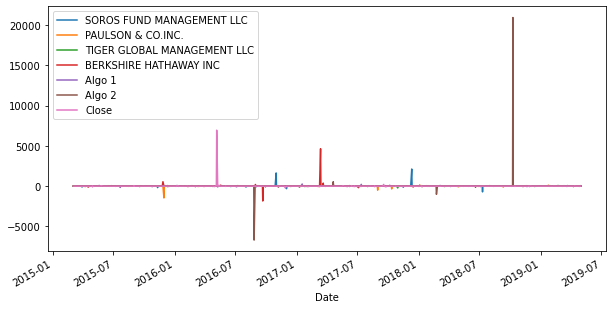

In [129]:
# Plot daily returns of all portfolios
port_returns = combined_returns.pct_change()
#port_returns.head()
port_returns.plot(figsize=(10,5))
port_returns


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

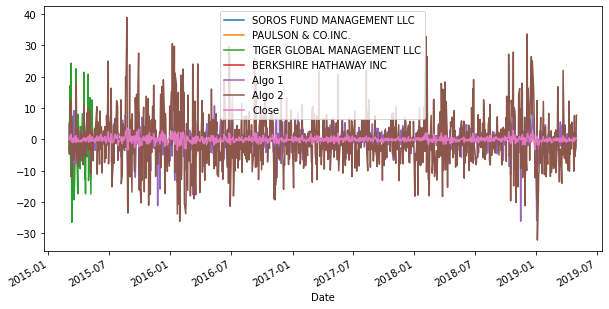

In [107]:
# Drop Nulls
#port_returns["Close"] = port_returns["Close"].dropna().copy()
#port_returns

# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + port_returns).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

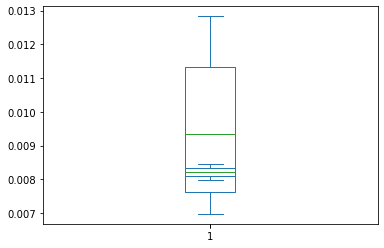

In [114]:
#whl std deviation
whl_daily_std = whl.std()
whl_daily_std.plot.box()

#algo std deviation
algo_daily_std = algo.std()
algo_daily_std.plot.box()


#sp_returns std deviation
sp_returns_daily_std = sp_returns.std()
sp_returns_daily_std.plot.box()


### Calculate Standard Deviations

In [115]:
# Calculate the daily standard deviations of all portfolios
# Daily Standard Deviations
daily_std = cumulative_returns.std()
daily_std.head()


SOROS FUND MANAGEMENT LLC       4.141413
PAULSON & CO.INC.               0.857016
TIGER GLOBAL MANAGEMENT LLC    11.642719
BERKSHIRE HATHAWAY INC          1.016634
Algo 1                          3.909184
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [118]:
# Calculate  the daily standard deviation of S&P TSX 60
#sp_returns std deviation
sp_returns_daily_std = sp_returns.std()
sp_returns_daily_std
# Determine which portfolios are riskier than the S&P TSX 60


Close    0.006637
dtype: float64

### Calculate the Annualized Standard Deviation

In [116]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC       65.742895
PAULSON & CO.INC.               13.604712
TIGER GLOBAL MANAGEMENT LLC    184.822430
BERKSHIRE HATHAWAY INC          16.138565
Algo 1                          62.056367
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

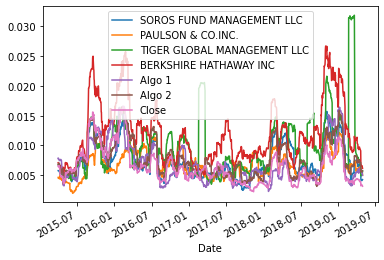

In [119]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot a rolling 21-day std dev of TSLA's closing prices
combined_returns.rolling(window=21).std().plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

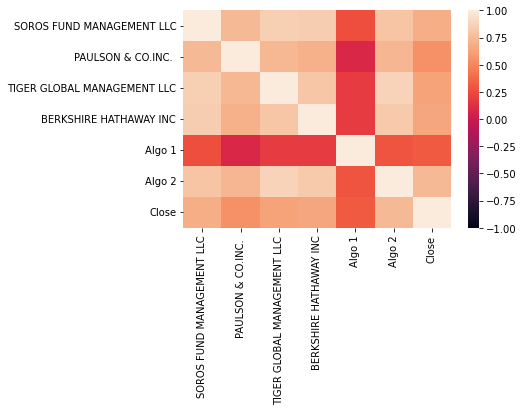

In [127]:
# Calculate the correlation
return_correlation = cumulative_returns.corr()
# Display de correlation matrix
sns.heatmap(return_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [141]:
# Calculate covariance of a single portfolio

covariance_soros = cumulative_returns['SOROS FUND MANAGEMENT LLC'].cov
covariance_soros


# Calculate variance of S&P TSX
variance_sp = cumulative_returns['Close'].var()
variance_sp
# Computing beta
soros_beta = covariance_soros / variance_sp
soros_beta
# Plot beta trend
soros_beta.plot()

<bound method Series.cov of Date
2015-03-03         NaN
2015-03-04   -1.762070
2015-03-05   -3.173432
2015-03-06    6.246788
2015-03-09   -0.460116
                ...   
2019-04-25         NaN
2019-04-26         NaN
2019-04-29         NaN
2019-04-30         NaN
2019-05-01         NaN
Name: SOROS FUND MANAGEMENT LLC, Length: 1029, dtype: float64>

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [142]:
# Annualized Sharpe Ratios
sharpe_ratios = ((cumulative_returns.mean()- cumulative_returns['rf_rate'].mean()) * 252) / (cumulative_returns.std() * np.sqrt(252))
sharpe_ratios

KeyError: 'rf_rate'

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!